# Лабараторная №1. Основый предобработки данных 

Используйте файл своей группы. <br>
Загрузите его в DataFrame и ответьте на вопросы, используя инстурменты из файла preprocessing.ipynb.


#### Воспросы
1. В какой шкале представлены все признаки в наборе?<br>
2. Укажите признак с наименьшей дисперсией.<br>
3. Среднее какого признака отличается для двух классов сильнее всего?<br>
4. В каком классе больше всего skilled работников?<br>
5. Есть ли в наборе признаки с выбросами? Какие?<br>
6. Сколько пропущенных значений в наборе?<br>
7. Попытайтесь заполнить пропущенные значения.<br>
8. Как минимум для одного признака каждого типа постройте диаграмму, которая может помочь его исследовать.<br>
9. Проанализируйте взаимосвязи признаков с помощью scatter-plot матрицы и тепловой карты корреляций. Какие выводы можно сделать?<br>
10. Какой признак(и) имеет смысл стандартизировать? Почему?<br>
11. Придумайте 1 новый признак, попытайтесь объяснить, почему он информативный.<br>


#### Ответы
1. 
checking_status    -    Интервальная<br>
duration    -    Абсолютная<br>
credit_history    -    Номинальная<br>
purpose    -    Номинальная<br>
credit_amount    -    Абсолютная<br>
savings_status    -    Интервальная<br>
employment    -    Интервальная<br>
installment_commitment    -    Абсолютная (?)<br>
other_parties    -    Номинальная<br>
property_magnitude    -    Номинальная<br>
age    -    Абсолютная<br>
other_payment_plans    -    Номинальная<br>
housing    -    Номинальная<br>
existing_credits    -    Абсолютная<br>
job    -    Номинальная<br>
num_dependents    -    Абсолютная<br>
foreign_worker    -    Номинальная<br>
class    -    Номинальная<br>

In [25]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

np.set_printoptions(precision=3)
pd.set_option('precision', 3)

sns.set()

credit_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 502 entries, 1 to 502
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         502 non-null    object 
 1   duration                502 non-null    float64
 2   credit_history          502 non-null    object 
 3   purpose                 502 non-null    object 
 4   credit_amount           502 non-null    float64
 5   savings_status          502 non-null    object 
 6   employment              502 non-null    object 
 7   installment_commitment  502 non-null    float64
 8   other_parties           502 non-null    object 
 9   property_magnitude      502 non-null    object 
 10  age                     502 non-null    float64
 11  other_payment_plans     502 non-null    object 
 12  housing                 502 non-null    object 
 13  existing_credits        502 non-null    float64
 14  job                     502 non-null    ob

In [2]:
path='credit_3530203_70101.csv'
credit_df = pd.read_csv(path, index_col=0)

2. Найдём дисперсии<br>

In [3]:
credit_df.var()

duration                  1.625e+02
credit_amount             7.967e+06
installment_commitment    1.224e+00
age                       1.271e+02
existing_credits          3.439e-01
num_dependents            1.396e-01
dtype: float64

In [4]:
credit_df.var().min()

0.1396092277596202

Ответ: минимальная дисперсия у признака num_dependents<br>
<br>
<br>
3. Среднее<br>

In [5]:
my_list = list(set(credit_df['class']))
my_list

['good', 'bad']

In [6]:
(credit_df.where(credit_df['class']=='good').mean()-credit_df.where(credit_df['class']=='bad').mean()).abs()

duration                    4.982
credit_amount             573.110
installment_commitment      0.103
age                         3.304
existing_credits            0.099
num_dependents              0.022
dtype: float64

Ответ: у признака credit_amount<br>
<br>
<br>
4. В каком классе больше всего skilled работников?<br>

In [26]:
bad_cnt = credit_df['class'].where(credit_df['job']=='skilled').where(credit_df['class'] == 'bad').count()
good_cnt = credit_df['class'].where(credit_df['job']=='skilled').where(credit_df['class'] == 'good').count()
max
if (good_cnt > bad_cnt):
    print('good')
else:
    print('bad')
credit_df[credit_df['job']=='skilled']['class'].value_counts()


good


good    213
bad     107
Name: class, dtype: int64

Ответ: good<br>
<br>
<br>
5. Есть ли в наборе признаки с выбросами? Какие?<br>

<AxesSubplot:xlabel='duration'>

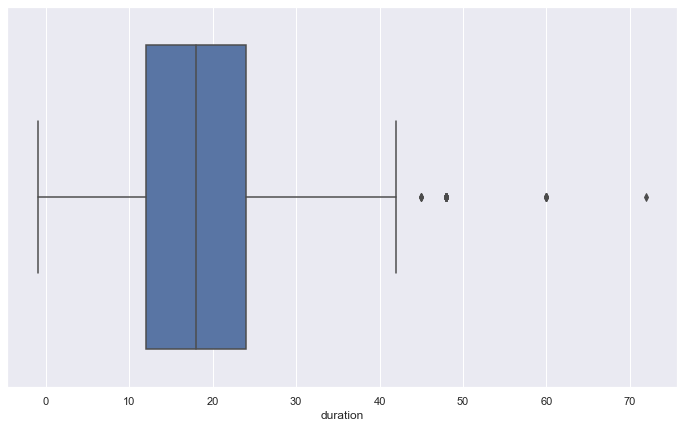

In [8]:
plt.subplots(figsize=(12,7))
names = ['duration', 'credit_amount', 'installment_commitment', 'age', 'existing_credits']
sns.boxplot(x = names[0], data=credit_df)

<AxesSubplot:xlabel='credit_amount'>

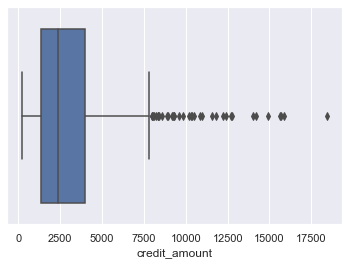

In [9]:
sns.boxplot(x = names[1], data=credit_df)

<AxesSubplot:xlabel='installment_commitment'>

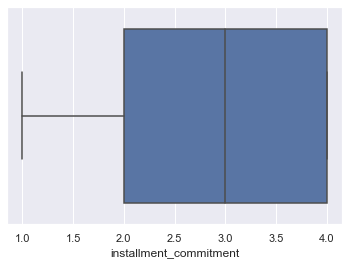

In [10]:
sns.boxplot(x = names[2], data=credit_df)

<AxesSubplot:xlabel='age'>

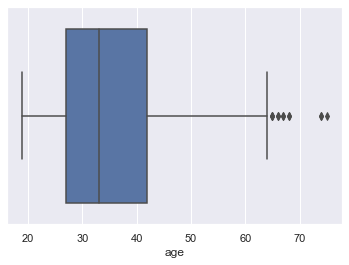

In [11]:
sns.boxplot(x = names[3], data=credit_df)

<AxesSubplot:xlabel='existing_credits'>

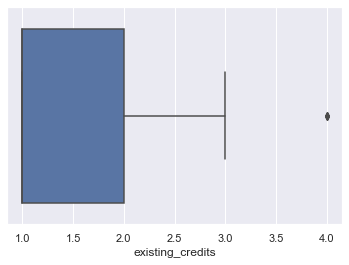

In [12]:
sns.boxplot(x = names[4], data=credit_df)

Ответ: выбросы существуют у duration, credit_amount, age, existing_credits<br>
<br>
<br>
6. Сколько пропущенных значений в наборе?<br>

In [13]:
credit_df1 = credit_df.replace(-1, np.NaN).replace('no checking', np.NaN).replace('no known savings', np.NaN).replace('unemployed', np.NaN).replace('none', np.NaN).replace('none', np.NaN)
no_zero_columns = list (set(credit_df1.columns))
(credit_df1[no_zero_columns].isnull()).sum().sum()

1204

Ответ: 1204 <br>
<br>
<br>
7. Попытайтесь заполнить пропущенные значения.<br>

In [14]:
credit_df1.isnull().mean()
credit_df1['checking_status'] = credit_df1['checking_status'].fillna(credit_df1['checking_status'].mode().max())
credit_df1['duration'] = credit_df1['duration'].fillna(credit_df1['duration'].mode().max())
credit_df1['savings_status'] = credit_df1['savings_status'].fillna(credit_df1['savings_status'].mode().max())
credit_df1['employment'] = credit_df1['employment'].fillna(credit_df1['employment'].mode().max())
credit_df1

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,other_parties,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,foreign_worker,class
1,0<=X<200,18.0,existing paid,radio/tv,1301.0,<100,>=7,4.0,guarantor,real estate,32.0,NaN,own,1.0,unskilled resident,1.0,yes,good
2,>=200,6.0,critical/other existing credit,new car,1323.0,100<=X<500,>=7,2.0,NaN,car,28.0,NaN,own,2.0,skilled,2.0,yes,good
3,<0,24.0,existing paid,new car,3123.0,<100,<1,4.0,NaN,life insurance,27.0,NaN,own,1.0,skilled,1.0,yes,bad
4,<0,36.0,existing paid,used car,5493.0,<100,>=7,2.0,NaN,no known property,42.0,NaN,for free,1.0,skilled,2.0,yes,good
5,>=200,9.0,existing paid,radio/tv,1126.0,100<=X<500,>=7,2.0,NaN,real estate,49.0,NaN,own,1.0,skilled,1.0,yes,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,<0,12.0,existing paid,furniture/equipment,1736.0,<100,4<=X<7,3.0,NaN,real estate,31.0,NaN,own,1.0,unskilled resident,1.0,yes,good
499,<0,30.0,existing paid,used car,3857.0,<100,1<=X<4,4.0,NaN,life insurance,40.0,NaN,own,1.0,high qualif/self emp/mgmt,1.0,yes,good
500,<0,12.0,existing paid,radio/tv,804.0,<100,>=7,4.0,NaN,car,38.0,NaN,own,1.0,skilled,1.0,yes,good
501,<0,45.0,existing paid,radio/tv,1845.0,<100,1<=X<4,4.0,NaN,no known property,23.0,NaN,for free,1.0,skilled,1.0,yes,bad


In [15]:
credit_df1.isnull().mean()

checking_status           0.000
duration                  0.000
credit_history            0.000
purpose                   0.000
credit_amount             0.000
savings_status            0.000
employment                0.000
installment_commitment    0.000
other_parties             0.904
property_magnitude        0.000
age                       0.000
other_payment_plans       0.805
housing                   0.000
existing_credits          0.000
job                       0.000
num_dependents            0.000
foreign_worker            0.000
class                     0.000
dtype: float64

In [16]:
chedit_df1 = credit_df1.drop(['other_parties', 'other_payment_plans'], axis = 1)
#credit_df1.loc[:, credit_df1.isnull().mean() < .5].shape
credit_df1.isnull().sum()

checking_status             0
duration                    0
credit_history              0
purpose                     0
credit_amount               0
savings_status              0
employment                  0
installment_commitment      0
other_parties             454
property_magnitude          0
age                         0
other_payment_plans       404
housing                     0
existing_credits            0
job                         0
num_dependents              0
foreign_worker              0
class                       0
dtype: int64

Ответ: для признаков checking_status, duration, savings_status и employment пустые значения были заменены на моду. Столбцы, пустые значения в которых занимали более половины места, были удалены.<br>
<br>
<br>
8. Как минимум для одного признака каждого типа постройте диаграмму, которая может помочь его исследовать.<br>

<AxesSubplot:xlabel='credit_history', ylabel='count'>

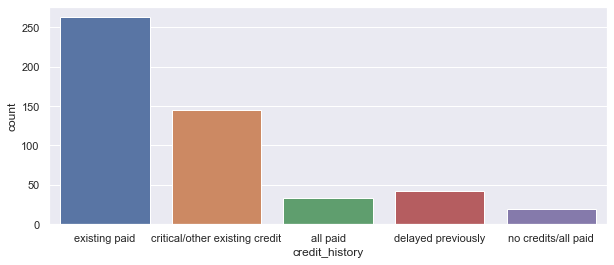

In [17]:
fig, axs = plt.subplots(figsize=(10,4))
#Абсолютная шкала
#credit_df1['duration'].hist(figsize=(10, 4))
sns.countplot(x='credit_history', data=credit_df1)

<AxesSubplot:>

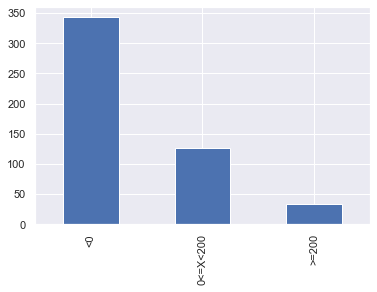

In [18]:
#Интервальная шкала
credit_df1['checking_status'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='credit_history', ylabel='count'>

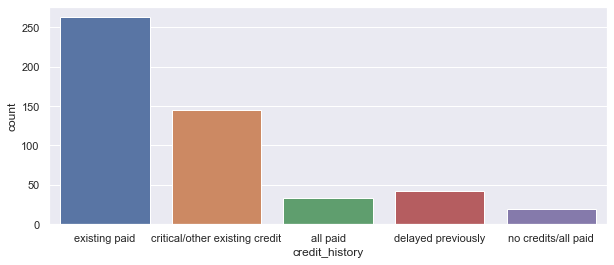

In [19]:
#Номинальная шкала
fig, axs = plt.subplots(figsize=(10,4))
sns.countplot(x='credit_history', data=credit_df1)

<br>
<br>
9. Проанализируйте взаимосвязи признаков с помощью scatter-plot матрицы и тепловой карты корреляций. Какие выводы можно сделать?<br>


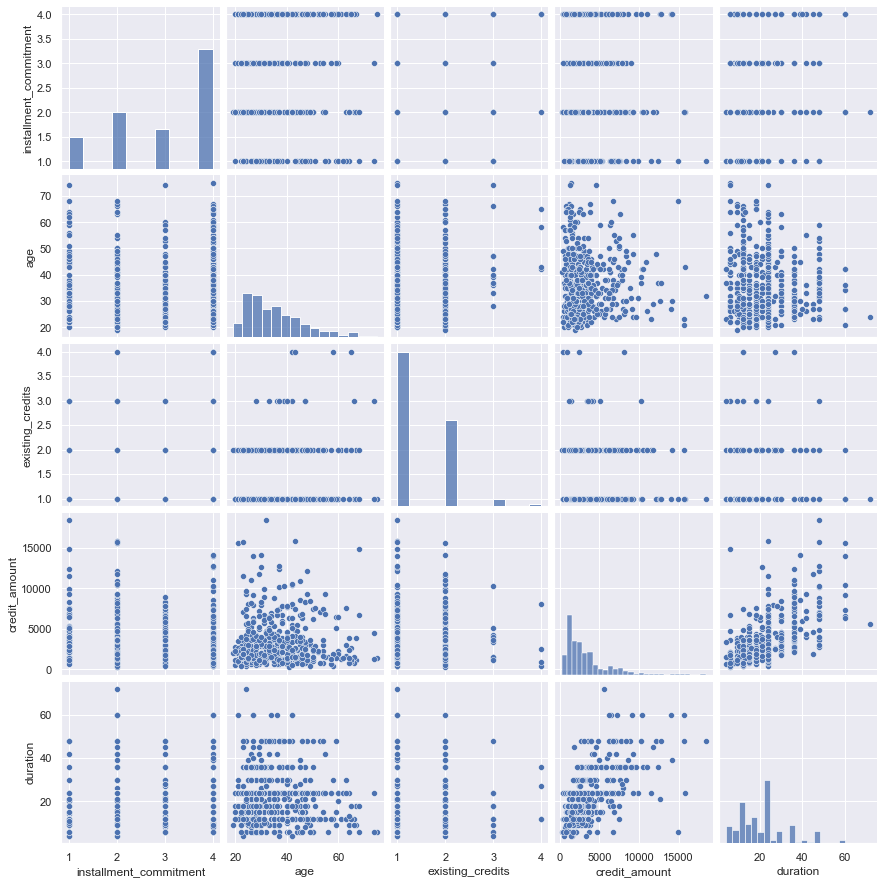

In [20]:
num_columns = list(set(credit_df1.columns)-set(['num_dependents']))
sns.pairplot(credit_df1[num_columns])

• Чем больше действующих кредитов, тем меньше их продолжительность<br>
• Чем больше размер кредита, тем меньше количество действующих кредитов<br>
• Чем старше человек, тем менее продолжительный кредиты он получает<br>
• В основном кредиты берут люди от 20 до 50 лет<br>
• Чем меньше размер кредита, тем меньше его продолжительность<br>

<AxesSubplot:>

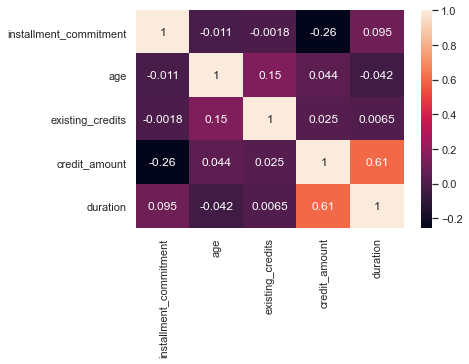

In [21]:
corr_matrix = credit_df1[num_columns].corr()
sns.heatmap(corr_matrix, annot=True, annot_kws={"size":12})

• Наибольшая взаимосвязь между продолжительностью и размером кредита<br>
• Нет определенной зависимости между обязательствами по рассрочке и другими признаками<br>
<br>
<br>
10. Какой признак(и) имеет смысл стандартизировать? Почему?<br>


<br>
<br>
<br>
11. Придумайте 1 новый признак, попытайтесь объяснить, почему он информативный.<br>
Доход<br>
От дохода зависит сумма и продолжительность кредита